# 1. data preprocessing

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data from Excel file and sheet
# 从Excel文件和表中加载数据
file_path = R"DryBeanDataset\Dry_Bean_Dataset.xlsx"
sheet_name = 'Dry_Beans_Dataset'

df = pd.read_excel(file_path, sheet_name=sheet_name)
print("data loaded!")

print("\n 1.Initial Data Overview")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset information:")
df.info()

# 1. Check for missing values
# 检查缺失值
print("\n2.Missing Value Check")
missing_values = df.isnull().sum() # 计算每列缺失值的数量
print("Missing values per column:")   
print(missing_values) 

# 是否有缺失值 if any missing values
if missing_values.sum() == 0:
    print("\nNo missing values found in the dataset.")
else:
    print("\nMissing values found. Imputation would be needed.")


# Determine and separate features X and target y 确定特征X和目标y
X = df.drop('Class', axis=1)  # 特征X
y = df['Class']  # 目标y

print("\n3.Handling Categorical Data")
# Class column is categorical. use LabelEncoder
# 目标列是Class。这里使用LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display sample of original and encoded labels
# 显示原始和编码标签的样本
print("Original class labels (sample):", y.unique()[:5])
print("Encoded class labels (sample):", pd.Series(y_encoded).unique()[:5])
print(f"Mapping of original labels to encoded integers:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name}: {i}")

# 2. Feature Standardization
print("\n4.Feature Standardization")
# Standardize features using StandardScaler
# 使用StandardScaler标准化特征
numerical_features = X.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame for inspection
# 将缩放的特征转回DataFrame进行检查
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)

print("First 5 rows of scaled features:")
print(X_scaled_df.head())
print("\nMean of scaled features (approx 0):")
print(X_scaled_df.mean())
print("\nStandard deviation of scaled features (approx 1):")
print(X_scaled_df.std())

print("\n--- Preprocessing Complete ---")
print("Shape of features (X_scaled):", X_scaled_df.shape)
print("Shape of target (y_encoded):", y_encoded.shape)


data loaded!

 1.Initial Data Overview
First 5 rows of the dataset:
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2

# 2. use t-SNE to reduce dimension and visualize the distribution of data

--- Starting t-SNE Visualization ---


d:\software\anaconda\envs\rm\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\software\anaconda\envs\rm\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "d:\software\anaconda\envs\rm\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "d:\software\anaconda\envs\rm\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\software\anaconda\envs\rm\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


t-SNE transformation complete.
Shape of t-SNE embedded data: (13611, 2)
Displaying t-SNE plot...


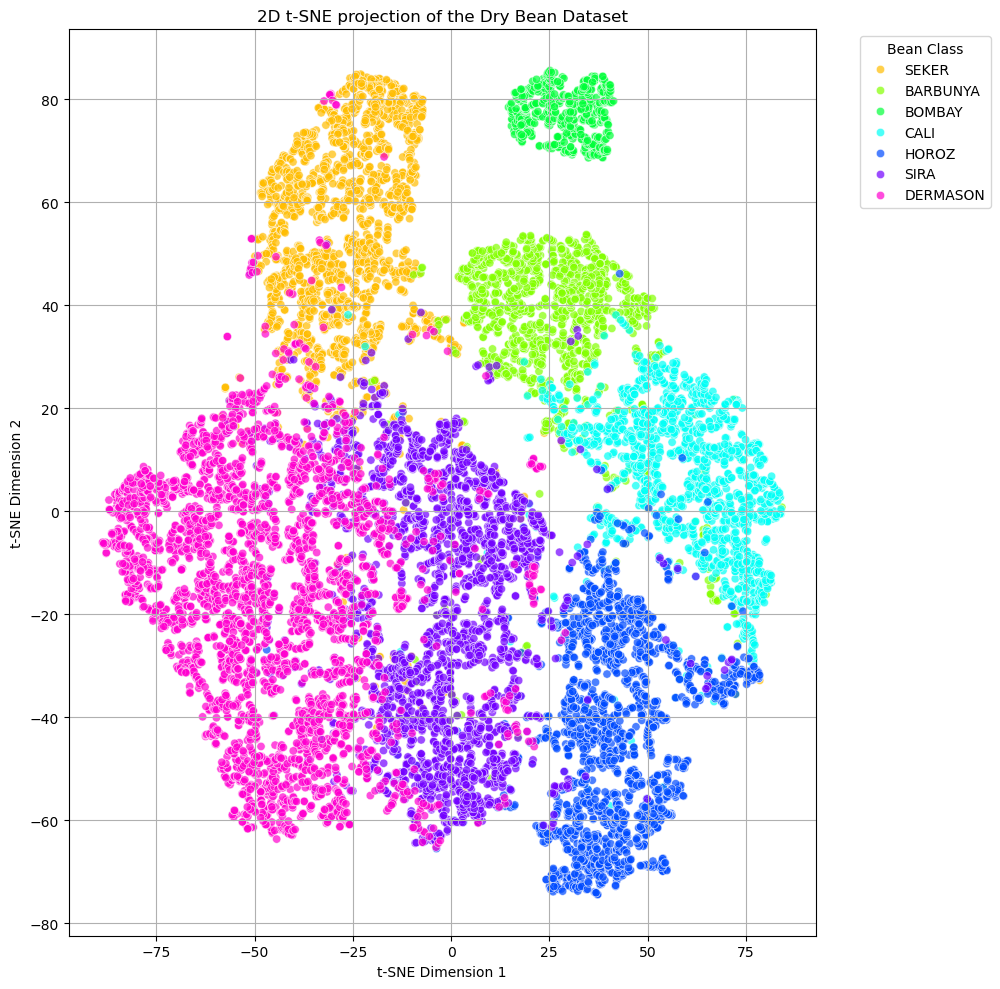

--- t-SNE Visualization Complete ---


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

print("--- Starting t-SNE Visualization ---")

# set t-SNE parameters 设置 t-SNE 参数
tsne = TSNE(
    n_components=2,         # 降维至2维
    random_state=42,        # 设置随机种子确保可重复性
    perplexity=30,         # 困惑度参数
    n_iter=1000,           # 迭代次数
    learning_rate=200      # 学习率
)

features_for_tsne = X_scaled_df.values
X_tsne = tsne.fit_transform(features_for_tsne)

print("t-SNE transformation complete.")
print("Shape of t-SNE embedded data:", X_tsne.shape)

# Create a DataFrame for t-SNE data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE_Dimension_1', 'TSNE_Dimension_2'])
tsne_df['Class_Encoded'] = y_encoded
tsne_df['Class_Original'] = label_encoder.inverse_transform(y_encoded) # For legend

# Create the scatter plot
# 创建散点图
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='TSNE_Dimension_1', y='TSNE_Dimension_2',  # 降维后的维度
    hue='Class_Original', # 类别标签
    palette=sns.color_palette("hsv", n_colors=len(label_encoder.classes_)),  # 对应的颜色 
    data=tsne_df,   # 数据
    legend="full",  # 显示图例
    alpha=0.7       # 点的透明度
)

plt.title('2D t-SNE projection of the Dry Bean Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Bean Class', bbox_to_anchor=(1.05, 1), loc='upper left') # 调整图例位置
plt.tight_layout(rect=[0,0,0.85,1]) # 调整布局以留出空间给图例 adjust layout for legend
plt.grid(True) # 添加网格 add grid
print("Displaying t-SNE plot...") 
plt.show()

print("--- t-SNE Visualization Complete ---")

# 3. clustering and visualization analysis

Number of true classes (for evaluation reference): 7

1.K-Means Clustering
K-Means Silhouette Score: 0.3094
K-Means Adjusted Rand Index (ARI): 0.6687
K-Means Normalized Mutual Information (NMI): 0.7138
K-Means Homogeneity: 0.7048
K-Means Completeness: 0.7229
K-Means V-measure: 0.7138

2.gglomerative Hierarchical Clustering
Agglomerative Silhouette Score: 0.2839
Agglomerative Adjusted Rand Index (ARI): 0.6580
Agglomerative Normalized Mutual Information (NMI): 0.7325
Agglomerative Homogeneity: 0.7083
Agglomerative Completeness: 0.7584
Agglomerative V-measure: 0.7325

Displaying clustering visualizations on t-SNE projection...


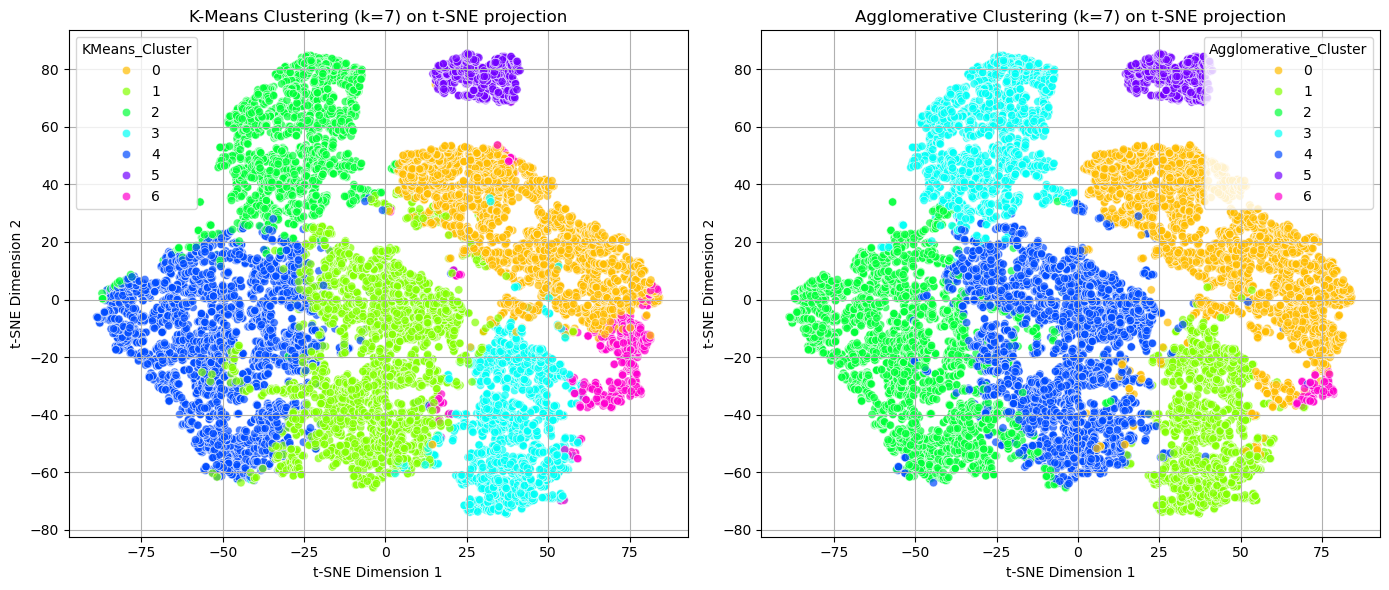


--- Clustering Analysis Complete ---


In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# 检查类别数 check the number of classes
n_true_clusters = len(label_encoder.classes_) # it should be 7 for this dataset 七个类
print(f"Number of true classes (for evaluation reference): {n_true_clusters}") 

features_for_clustering = X_scaled_df.values

# 1.K-Means Clustering
print("\n1.K-Means Clustering")
kmeans = KMeans(n_clusters=n_true_clusters, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(features_for_clustering)

# K-Means‘s Evaluation Metrics # K-Means算法的各种评估指标
kmeans_silhouette = silhouette_score(features_for_clustering, kmeans_labels)
kmeans_ari = adjusted_rand_score(y_encoded, kmeans_labels)
kmeans_nmi = normalized_mutual_info_score(y_encoded, kmeans_labels)
kmeans_homogeneity = homogeneity_score(y_encoded, kmeans_labels)
kmeans_completeness = completeness_score(y_encoded, kmeans_labels)
kmeans_v_measure = v_measure_score(y_encoded, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"K-Means Adjusted Rand Index (ARI): {kmeans_ari:.4f}")
print(f"K-Means Normalized Mutual Information (NMI): {kmeans_nmi:.4f}")
print(f"K-Means Homogeneity: {kmeans_homogeneity:.4f}")
print(f"K-Means Completeness: {kmeans_completeness:.4f}")
print(f"K-Means V-measure: {kmeans_v_measure:.4f}")

# 2.Agglomerative Hierarchical Clustering 层次聚类
print("\n2.gglomerative Hierarchical Clustering")
#  Ward's Method 
agglomerative = AgglomerativeClustering(n_clusters=n_true_clusters, linkage='ward') 
agglomerative_labels = agglomerative.fit_predict(features_for_clustering)

# Agglomerative Clustering's Evaluation Metrics 层次聚类算法的各种评估指标
agg_silhouette = silhouette_score(features_for_clustering, agglomerative_labels)
agg_ari = adjusted_rand_score(y_encoded, agglomerative_labels)
agg_nmi = normalized_mutual_info_score(y_encoded, agglomerative_labels)
agg_homogeneity = homogeneity_score(y_encoded, agglomerative_labels)
agg_completeness = completeness_score(y_encoded, agglomerative_labels)
agg_v_measure = v_measure_score(y_encoded, agglomerative_labels)

print(f"Agglomerative Silhouette Score: {agg_silhouette:.4f}")
print(f"Agglomerative Adjusted Rand Index (ARI): {agg_ari:.4f}")
print(f"Agglomerative Normalized Mutual Information (NMI): {agg_nmi:.4f}")
print(f"Agglomerative Homogeneity: {agg_homogeneity:.4f}")
print(f"Agglomerative Completeness: {agg_completeness:.4f}")
print(f"Agglomerative V-measure: {agg_v_measure:.4f}")


# tsne_vis_df 包含t-SNE降维后的二维数据
tsne_vis_df = pd.DataFrame(data=X_tsne, columns=['TSNE_Dimension_1', 'TSNE_Dimension_2'])

# K-Means Visualization k-Means可视化
tsne_vis_df['KMeans_Cluster'] = kmeans_labels 
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='TSNE_Dimension_1', y='TSNE_Dimension_2',
    hue='KMeans_Cluster',
    palette=sns.color_palette("hsv", n_colors=n_true_clusters),
    data=tsne_vis_df,
    legend="full",
    alpha=0.7
)
plt.title(f'K-Means Clustering (k={n_true_clusters}) on t-SNE projection') 
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)

# Agglomerative Clustering Visualization 层次聚类可视化
tsne_vis_df['Agglomerative_Cluster'] = agglomerative_labels
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='TSNE_Dimension_1', y='TSNE_Dimension_2',    # 散点图
    hue='Agglomerative_Cluster',    
    palette=sns.color_palette("hsv", n_colors=n_true_clusters),    # 颜色
    data=tsne_vis_df,     # 数据
    legend="full",     # 图例
    alpha=0.7     # 透明度
)
plt.title(f'Agglomerative Clustering (k={n_true_clusters}) on t-SNE projection')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)

plt.tight_layout()
print("\nDisplaying clustering visualizations on t-SNE projection...")
plt.show()

print("\n--- Clustering Analysis Complete ---")

# 4. train model

### 4.0 function definition and train-test split

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder # Should be available from previous steps

# Function to plot confusion matrix 画混淆矩阵的函数
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):  
    plt.figure(figsize=(8, 6))  # 设置画布大小
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)  # 画混淆矩阵
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def get_predict(model, X_train, X_test, X_all): 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_all_pred = model.predict(X_all)
    
    return y_train_pred, y_test_pred, y_all_pred

# Function to evaluate model performance 评估模型性能
def evaluate_model(model, y_pred, y_true, dataset_name, class_names):
    
    accuracy = accuracy_score(y_true, y_pred)  # calculate accuracy 计算准确率
    report = classification_report(y_true, y_pred, target_names=class_names, zero_division=0, digits=2)  # calculate classification report 计算分类报告
    cm = confusion_matrix(y_true, y_pred)  # calculate confusion matrix 计算混淆矩阵
    
    print(f"\n--- Evaluation on {dataset_name} ---") 
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    print("Confusion Matrix:")
    
    # print the confusion matrix
    plot_confusion_matrix(cm, classes=class_names, title=f'Confusion Matrix - {model.__class__.__name__} on {dataset_name}')
    return accuracy, report, cm

from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Function to plot ROC curve and calculate AUC 画ROC曲线并计算AUC
def plot_roc_and_calculate_auc(y_scores, y_true, class_names, title_suffix="", verbose = True):

    if verbose:
        print("\n" + "="*60)
        print(f"ROC Curve Analysis for {title_suffix}")
        print("="*60)

    n_classes = len(class_names)
    y_true = y_true.copy()
    
    # Binarize the output 
    y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
    
    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Plot each class's ROC curve
        plt.plot(fpr[i], tpr[i], 
                label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
    
    # Plot diagonal line
    plt.plot([0, 1], [0, 1], 'k--')
    
    # Compute micro-average AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    if verbose:
        for i, name in enumerate(class_names):
            print(f"{name}: AUC = {roc_auc[i]:.4f}")
        print(f"\nMulticlass Classification Results ({title_suffix}):")
        print(f"\nMicro-average AUC: {roc_auc['micro']:.4f}")
    
    # Plot micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"],
            label=f'Micro-avg (AUC = {roc_auc["micro"]:.2f})',
            color='deeppink', linestyle=':', linewidth=4)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {title_suffix}') 
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    # plt.show()



# Load the dataset
X = X_scaled_df.values
y = y_encoded

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

class_names_original = label_encoder.classes_

Shape of X_train: (9527, 16)
Shape of X_test: (4084, 16)
Shape of y_train: (9527,)
Shape of y_test: (4084,)


## 4.1 train logistic regression



--- Training and Evaluating Logistic Regression ---


d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression model trained.

Evaluating Logistic Regression on Training Set:

--- Evaluation on Training Set ---
Accuracy: 0.9187

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       925
      BOMBAY       1.00      1.00      1.00       365
        CALI       0.93      0.94      0.93      1141
    DERMASON       0.93      0.91      0.92      2482
       HOROZ       0.95      0.95      0.95      1350
       SEKER       0.96      0.94      0.95      1419
        SIRA       0.82      0.89      0.85      1845

    accuracy                           0.92      9527
   macro avg       0.93      0.93      0.93      9527
weighted avg       0.92      0.92      0.92      9527

Confusion Matrix:


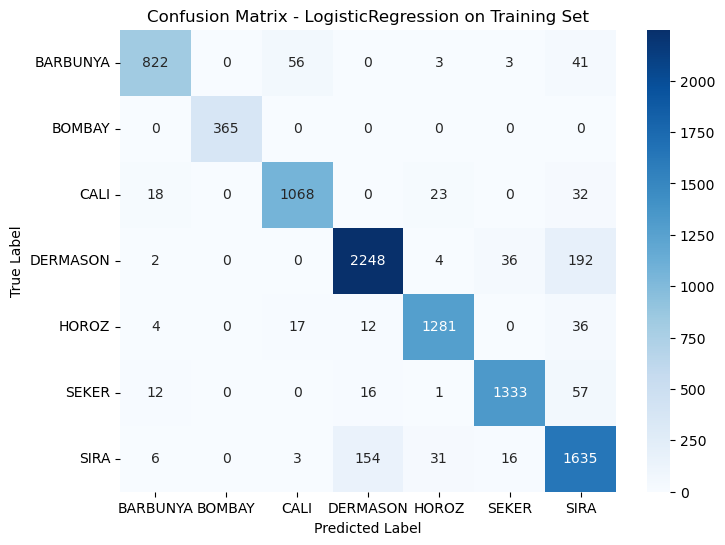


Evaluating Logistic Regression on Test Set:

--- Evaluation on Test Set ---
Accuracy: 0.9153

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.87      0.91       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.93      0.94      0.94       489
    DERMASON       0.92      0.89      0.90      1064
       HOROZ       0.96      0.95      0.95       578
       SEKER       0.94      0.94      0.94       608
        SIRA       0.82      0.90      0.85       791

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084

Confusion Matrix:


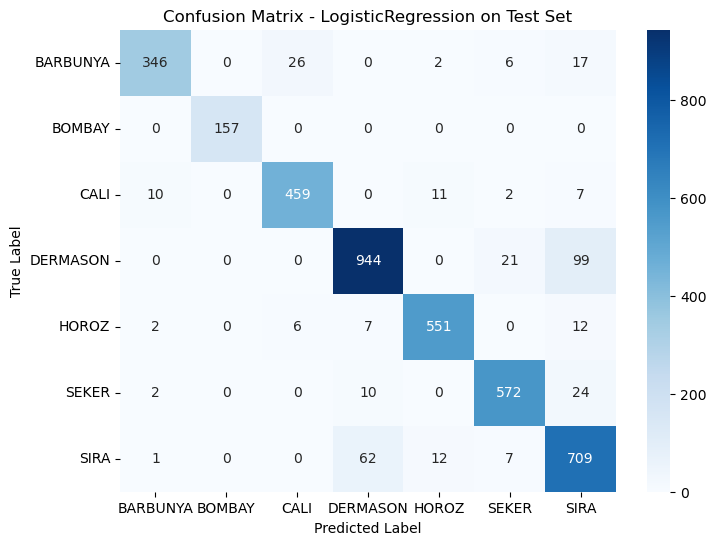


Evaluating Logistic Regression on Entire Dataset:

--- Evaluation on Entire Dataset ---
Accuracy: 0.9176

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.88      0.92      1322
      BOMBAY       1.00      1.00      1.00       522
        CALI       0.93      0.94      0.94      1630
    DERMASON       0.92      0.90      0.91      3546
       HOROZ       0.95      0.95      0.95      1928
       SEKER       0.95      0.94      0.95      2027
        SIRA       0.82      0.89      0.85      2636

    accuracy                           0.92     13611
   macro avg       0.93      0.93      0.93     13611
weighted avg       0.92      0.92      0.92     13611

Confusion Matrix:


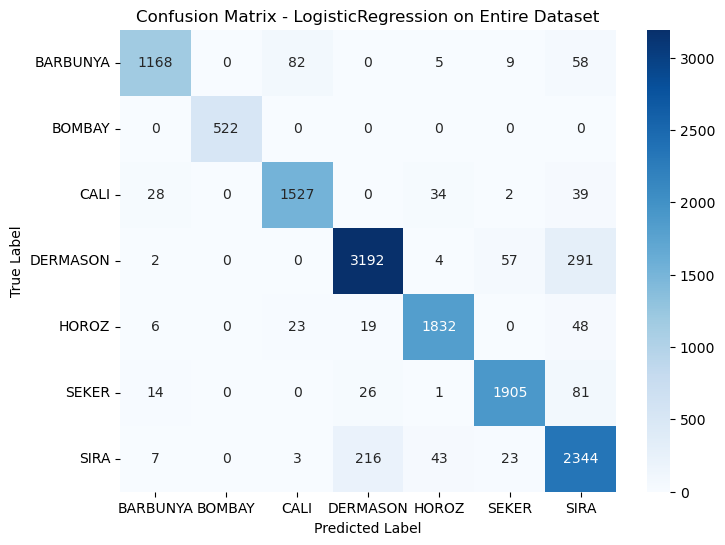


ROC Curve Analysis for Logistic Regression - test set
BARBUNYA: AUC = 0.9950
BOMBAY: AUC = 1.0000
CALI: AUC = 0.9955
DERMASON: AUC = 0.9908
HOROZ: AUC = 0.9977
SEKER: AUC = 0.9965
SIRA: AUC = 0.9830

Multiclass Classification Results (Logistic Regression - test set):

Micro-average AUC: 0.9950


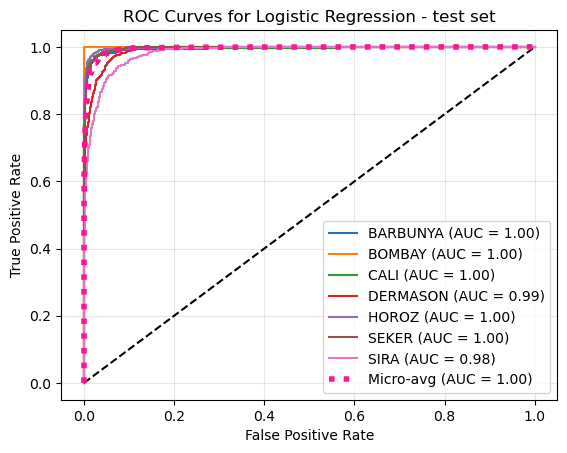

In [6]:
from sklearn.linear_model import LogisticRegression

print("\n\n--- Training and Evaluating Logistic Regression ---")

log_reg_model = LogisticRegression(
    solver='saga',
    multi_class='ovr', 
    random_state=42,
    max_iter=1000,
    C=1.0
)
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model trained.")

y_train_pred, y_test_pred, y_all_pred = get_predict(log_reg_model, X_train, X_test, X)
# Evaluate on Training set
print("\nEvaluating Logistic Regression on Training Set:")
evaluate_model(log_reg_model, y_train_pred, y_train, "Training Set", class_names_original)

# Evaluate on Test set
print("\nEvaluating Logistic Regression on Test Set:")
evaluate_model(log_reg_model, y_test_pred, y_test, "Test Set", class_names_original)

# Evaluate on Entire dataset
print("\nEvaluating Logistic Regression on Entire Dataset:")
evaluate_model(log_reg_model, y_all_pred, y, "Entire Dataset", class_names_original)

y_test_scores = log_reg_model.predict_proba(X_test)
plot_roc_and_calculate_auc(y_test_scores, y_test, class_names_original, title_suffix="Logistic Regression - test set")

## 4.2 train decision tree



--- Training and Evaluating Decision Tree Classifier ---
Decision Tree model trained.

Evaluating Decision Tree on Training Set:

--- Evaluation on Training Set ---
Accuracy: 0.9692

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.95      0.96       925
      BOMBAY       1.00      1.00      1.00       365
        CALI       0.96      0.97      0.96      1141
    DERMASON       0.97      0.98      0.97      2482
       HOROZ       0.99      0.97      0.98      1350
       SEKER       0.99      0.98      0.99      1419
        SIRA       0.94      0.95      0.95      1845

    accuracy                           0.97      9527
   macro avg       0.97      0.97      0.97      9527
weighted avg       0.97      0.97      0.97      9527

Confusion Matrix:


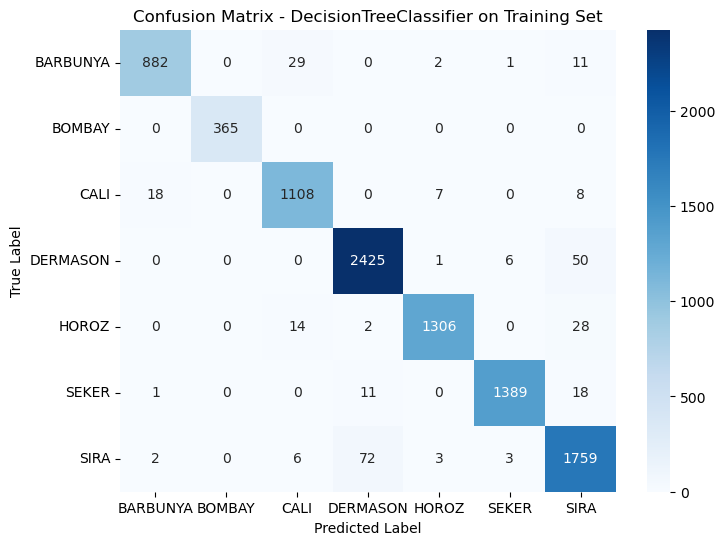


Evaluating Decision Tree on Test Set:

--- Evaluation on Test Set ---
Accuracy: 0.8996

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.90      0.87      0.88       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.90      0.92      0.91       489
    DERMASON       0.89      0.90      0.90      1064
       HOROZ       0.95      0.93      0.94       578
       SEKER       0.93      0.93      0.93       608
        SIRA       0.83      0.83      0.83       791

    accuracy                           0.90      4084
   macro avg       0.92      0.91      0.91      4084
weighted avg       0.90      0.90      0.90      4084

Confusion Matrix:


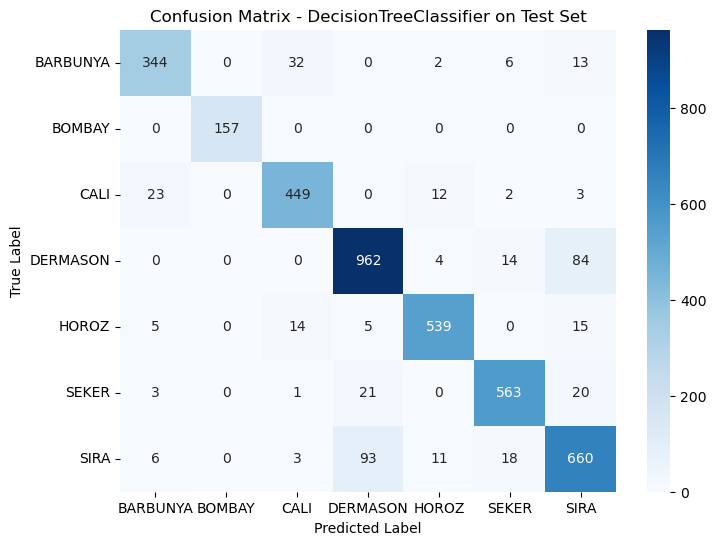


Evaluating Decision Tree on Entire Dataset:

--- Evaluation on Entire Dataset ---
Accuracy: 0.9484

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.93      0.94      1322
      BOMBAY       1.00      1.00      1.00       522
        CALI       0.94      0.96      0.95      1630
    DERMASON       0.94      0.96      0.95      3546
       HOROZ       0.98      0.96      0.97      1928
       SEKER       0.98      0.96      0.97      2027
        SIRA       0.91      0.92      0.91      2636

    accuracy                           0.95     13611
   macro avg       0.96      0.95      0.96     13611
weighted avg       0.95      0.95      0.95     13611

Confusion Matrix:


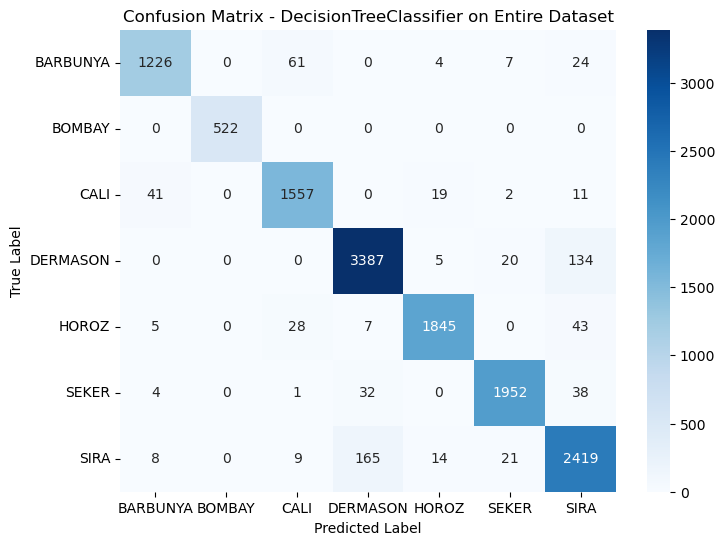


ROC Curve Analysis for Decision Tree - test set
BARBUNYA: AUC = 0.9519
BOMBAY: AUC = 1.0000
CALI: AUC = 0.9656
DERMASON: AUC = 0.9609
HOROZ: AUC = 0.9720
SEKER: AUC = 0.9688
SIRA: AUC = 0.9342

Multiclass Classification Results (Decision Tree - test set):

Micro-average AUC: 0.9640


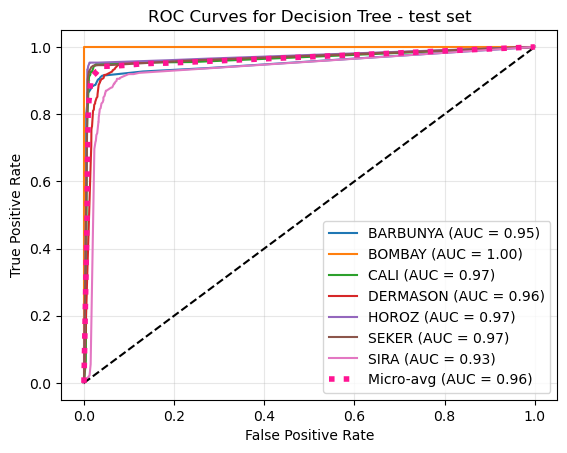

In [11]:
from sklearn.tree import DecisionTreeClassifier

print("\n\n--- Training and Evaluating Decision Tree Classifier ---")

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10) # Example: max_depth=10
dt_model.fit(X_train, y_train)
print("Decision Tree model trained.")

y_train_pred, y_test_pred, y_all_pred = get_predict(dt_model, X_train, X_test, X)
# Evaluate on Training set
print("\nEvaluating Decision Tree on Training Set:")
evaluate_model(dt_model, y_train_pred, y_train, "Training Set", class_names_original)

# Evaluate on Test set
print("\nEvaluating Decision Tree on Test Set:")
evaluate_model(dt_model, y_test_pred, y_test, "Test Set", class_names_original)

# Evaluate on Entire dataset
print("\nEvaluating Decision Tree on Entire Dataset:")
evaluate_model(dt_model, y_all_pred, y, "Entire Dataset", class_names_original)

y_test_scores = dt_model.predict_proba(X_test)
plot_roc_and_calculate_auc(y_test_scores, y_test, class_names_original, title_suffix="Decision Tree - test set")

## 4.3 train Gradient Boosting Classifier



--- Gradient Boosting Classifier ---
Gradient Boosting model trained.

Evaluating Gradient Boosting Tree (GBT) on Training Set:

--- Evaluation on Training Set ---
Accuracy: 0.9675

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.99      0.98      0.99       925
      BOMBAY       1.00      1.00      1.00       365
        CALI       0.99      0.99      0.99      1141
    DERMASON       0.95      0.97      0.96      2482
       HOROZ       0.99      0.98      0.98      1350
       SEKER       0.98      0.98      0.98      1419
        SIRA       0.94      0.92      0.93      1845

    accuracy                           0.97      9527
   macro avg       0.98      0.97      0.98      9527
weighted avg       0.97      0.97      0.97      9527

Confusion Matrix:


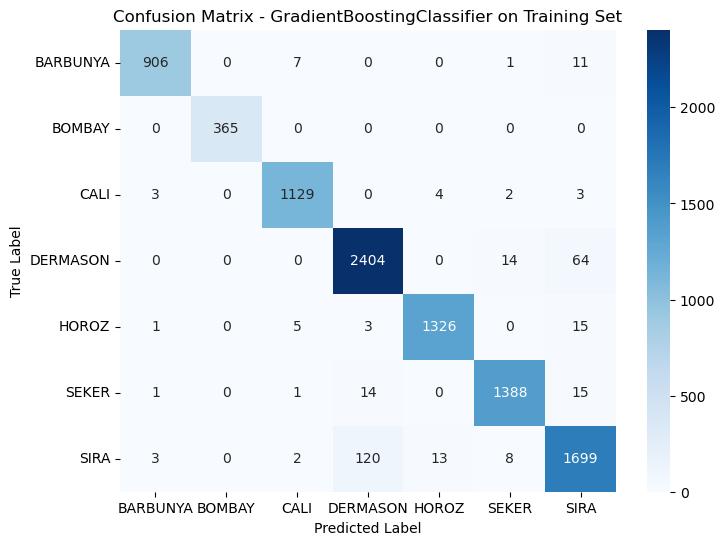


Evaluating Gradient Boosting Tree (GBT) on Test Set:

--- Evaluation on Test Set ---
Accuracy: 0.9194

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.90      0.93       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.95      0.94      0.94       489
    DERMASON       0.89      0.92      0.91      1064
       HOROZ       0.96      0.96      0.96       578
       SEKER       0.95      0.95      0.95       608
        SIRA       0.85      0.84      0.85       791

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084

Confusion Matrix:


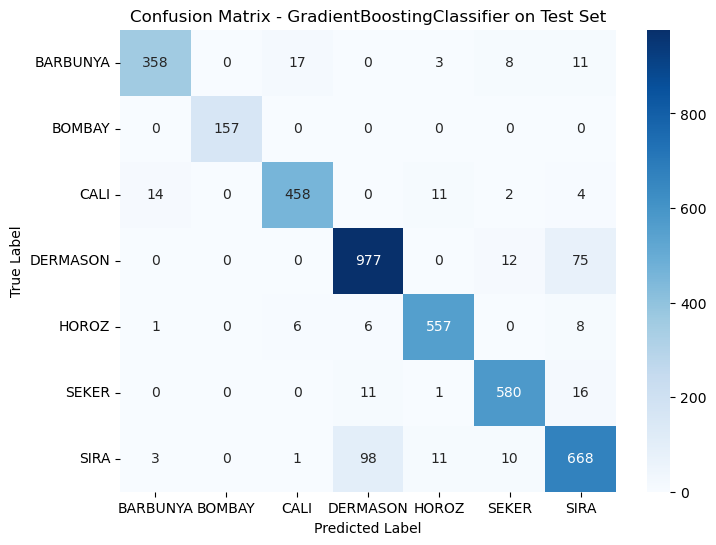


Evaluating Gradient Boosting Tree (GBT) on Entire Dataset:

--- Evaluation on Entire Dataset ---
Accuracy: 0.9531

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.96      0.97      1322
      BOMBAY       1.00      1.00      1.00       522
        CALI       0.98      0.97      0.97      1630
    DERMASON       0.93      0.95      0.94      3546
       HOROZ       0.98      0.98      0.98      1928
       SEKER       0.97      0.97      0.97      2027
        SIRA       0.91      0.90      0.91      2636

    accuracy                           0.95     13611
   macro avg       0.96      0.96      0.96     13611
weighted avg       0.95      0.95      0.95     13611

Confusion Matrix:


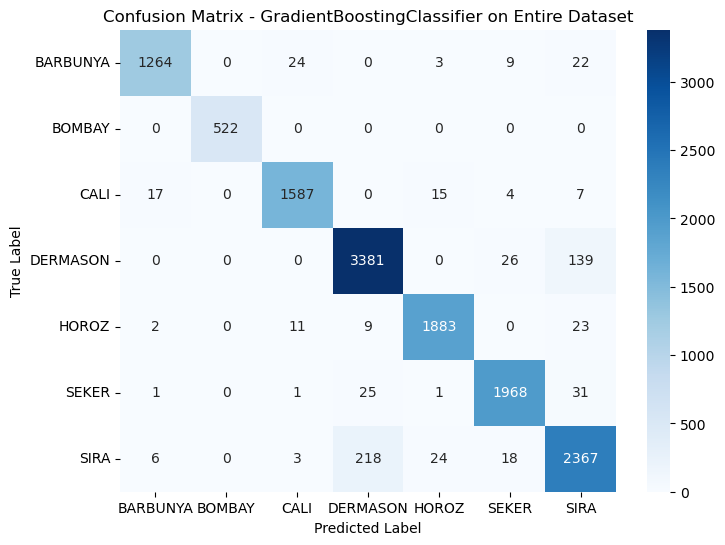


ROC Curve Analysis for Gradient Boosting - test set
BARBUNYA: AUC = 0.9932
BOMBAY: AUC = 1.0000
CALI: AUC = 0.9962
DERMASON: AUC = 0.9915
HOROZ: AUC = 0.9973
SEKER: AUC = 0.9970
SIRA: AUC = 0.9847

Multiclass Classification Results (Gradient Boosting - test set):

Micro-average AUC: 0.9955


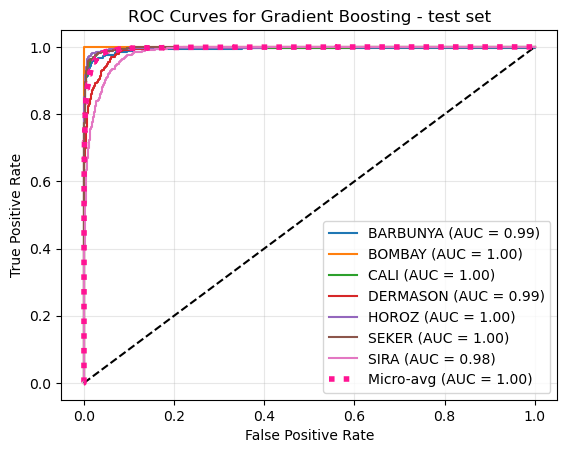

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
print("\n\n--- Gradient Boosting Classifier ---")

# train the GBT model
gdb_model = GradientBoostingClassifier(random_state=42)
gdb_model.fit(X_train, y_train)
print("Gradient Boosting model trained.")

y_train_pred, y_test_pred, y_all_pred = get_predict(gdb_model, X_train, X_test, X)
# Evaluate on Training set
print("\nEvaluating Gradient Boosting Tree (GBT) on Training Set:")
evaluate_model(gdb_model, y_train_pred, y_train, "Training Set", class_names=class_names_original)

# Evaluate on Test set
print("\nEvaluating Gradient Boosting Tree (GBT) on Test Set:")
evaluate_model(gdb_model, y_test_pred, y_test, "Test Set", class_names=class_names_original)

# Evaluate on Entire dataset
print("\nEvaluating Gradient Boosting Tree (GBT) on Entire Dataset:")
evaluate_model(gdb_model, y_all_pred, y, "Entire Dataset", class_names=class_names_original)

y_test_scores = gdb_model.predict_proba(X_test)
plot_roc_and_calculate_auc(y_test_scores, y_test, class_names_original, title_suffix="Gradient Boosting - test set")

## 4.4 train random forest classifier



--- Training and Evaluating Random Forest Classifier ---
Random Forest model trained.

Evaluating Random Forest on Training Set:

--- Evaluation on Training Set ---
Accuracy: 0.9669

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.99      0.94      0.96       925
      BOMBAY       1.00      1.00      1.00       365
        CALI       0.96      0.98      0.97      1141
    DERMASON       0.95      0.98      0.96      2482
       HOROZ       0.99      0.97      0.98      1350
       SEKER       0.99      0.98      0.99      1419
        SIRA       0.93      0.94      0.94      1845

    accuracy                           0.97      9527
   macro avg       0.97      0.97      0.97      9527
weighted avg       0.97      0.97      0.97      9527

Confusion Matrix:


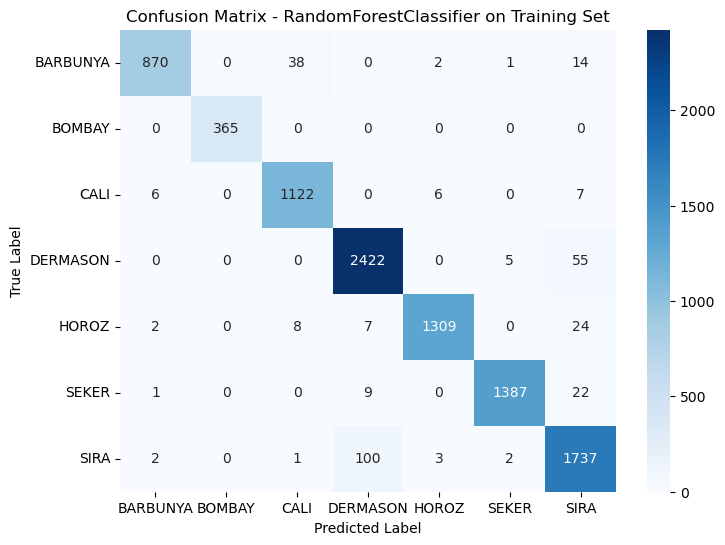


Evaluating Random Forest on Test Set:

--- Evaluation on Test Set ---
Accuracy: 0.9194

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.93      0.94      0.94       489
    DERMASON       0.91      0.91      0.91      1064
       HOROZ       0.96      0.96      0.96       578
       SEKER       0.93      0.94      0.94       608
        SIRA       0.86      0.86      0.86       791

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084

Confusion Matrix:


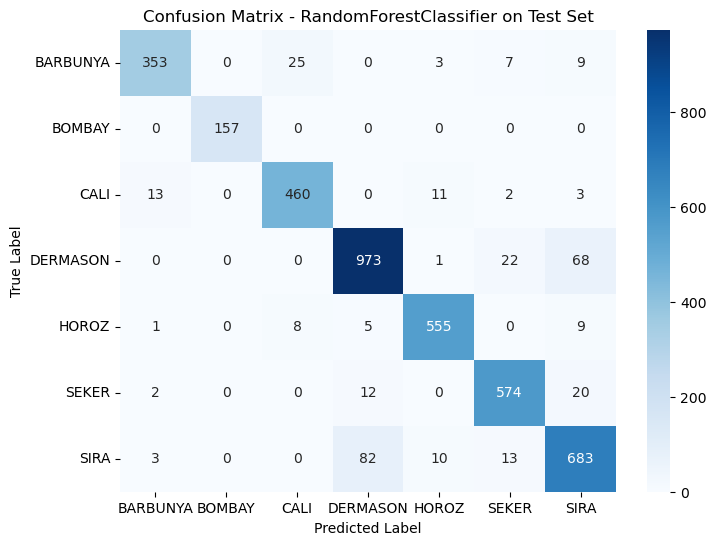


Evaluating Random Forest on Entire Dataset:

--- Evaluation on Entire Dataset ---
Accuracy: 0.9527

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.93      0.95      1322
      BOMBAY       1.00      1.00      1.00       522
        CALI       0.95      0.97      0.96      1630
    DERMASON       0.94      0.96      0.95      3546
       HOROZ       0.98      0.97      0.97      1928
       SEKER       0.97      0.97      0.97      2027
        SIRA       0.91      0.92      0.92      2636

    accuracy                           0.95     13611
   macro avg       0.96      0.96      0.96     13611
weighted avg       0.95      0.95      0.95     13611

Confusion Matrix:


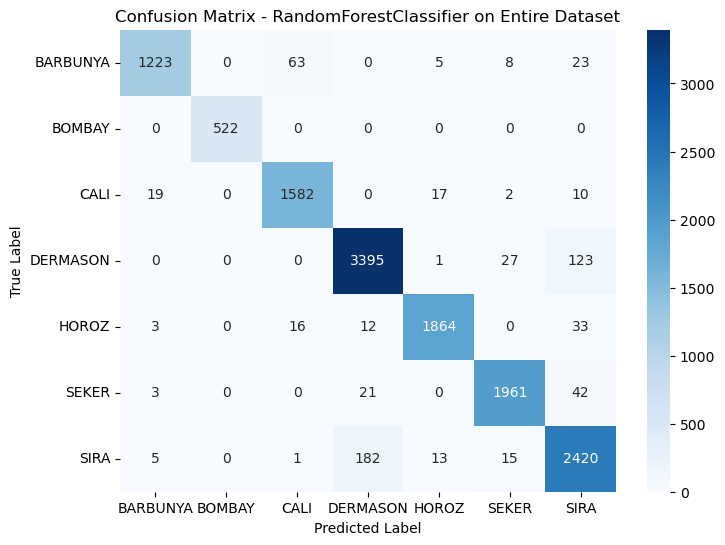


ROC Curve Analysis for Random Forest - test set
BARBUNYA: AUC = 0.9925
BOMBAY: AUC = 1.0000
CALI: AUC = 0.9943
DERMASON: AUC = 0.9919
HOROZ: AUC = 0.9976
SEKER: AUC = 0.9962
SIRA: AUC = 0.9861

Multiclass Classification Results (Random Forest - test set):

Micro-average AUC: 0.9952


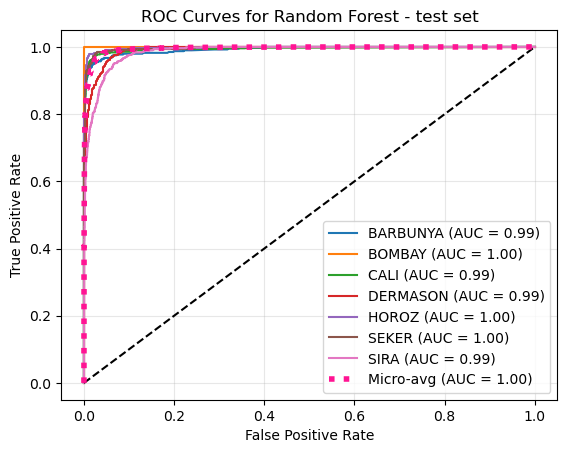

In [10]:
from sklearn.ensemble import RandomForestClassifier

print("\n\n--- Training and Evaluating Random Forest Classifier ---")
# Initialize and train Random Forest model
# n_estimators is the number of trees in the forest.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, n_jobs=-1) # n_jobs=-1 uses all processors
rf_model.fit(X_train, y_train)
print("Random Forest model trained.")

y_train_pred, y_test_pred, y_all_pred = get_predict(rf_model, X_train, X_test, X)
# Evaluate on Training set
print("\nEvaluating Random Forest on Training Set:")
evaluate_model(rf_model, y_train_pred, y_train, "Training Set", class_names_original)

# Evaluate on Test set
print("\nEvaluating Random Forest on Test Set:")
evaluate_model(rf_model, y_test_pred, y_test, "Test Set", class_names_original)

# Evaluate on Entire dataset
print("\nEvaluating Random Forest on Entire Dataset:")
evaluate_model(rf_model, y_all_pred, y, "Entire Dataset", class_names_original)

y_test_scores = rf_model.predict_proba(X_test)
plot_roc_and_calculate_auc(y_test_scores, y_test, class_names_original, title_suffix="Random Forest - test set")

# 5 Evaluation and Choice of Prediction Model
### 5.1 Calculate metrics such as accuracy, precision, recall, and F1-score for each model trained.


--- Logistic Regression ---
Accuracy: 0.9153
Weighted Precision: 0.9176
Weighted Recall: 0.9153
Weighted F1: 0.9158

--- Decision Tree ---
Accuracy: 0.8996
Weighted Precision: 0.8999
Weighted Recall: 0.8996
Weighted F1: 0.8997

--- Gradient Boosting ---
Accuracy: 0.9194
Weighted Precision: 0.9196
Weighted Recall: 0.9194
Weighted F1: 0.9194

--- Random Forest ---
Accuracy: 0.9194
Weighted Precision: 0.9196
Weighted Recall: 0.9194
Weighted F1: 0.9194


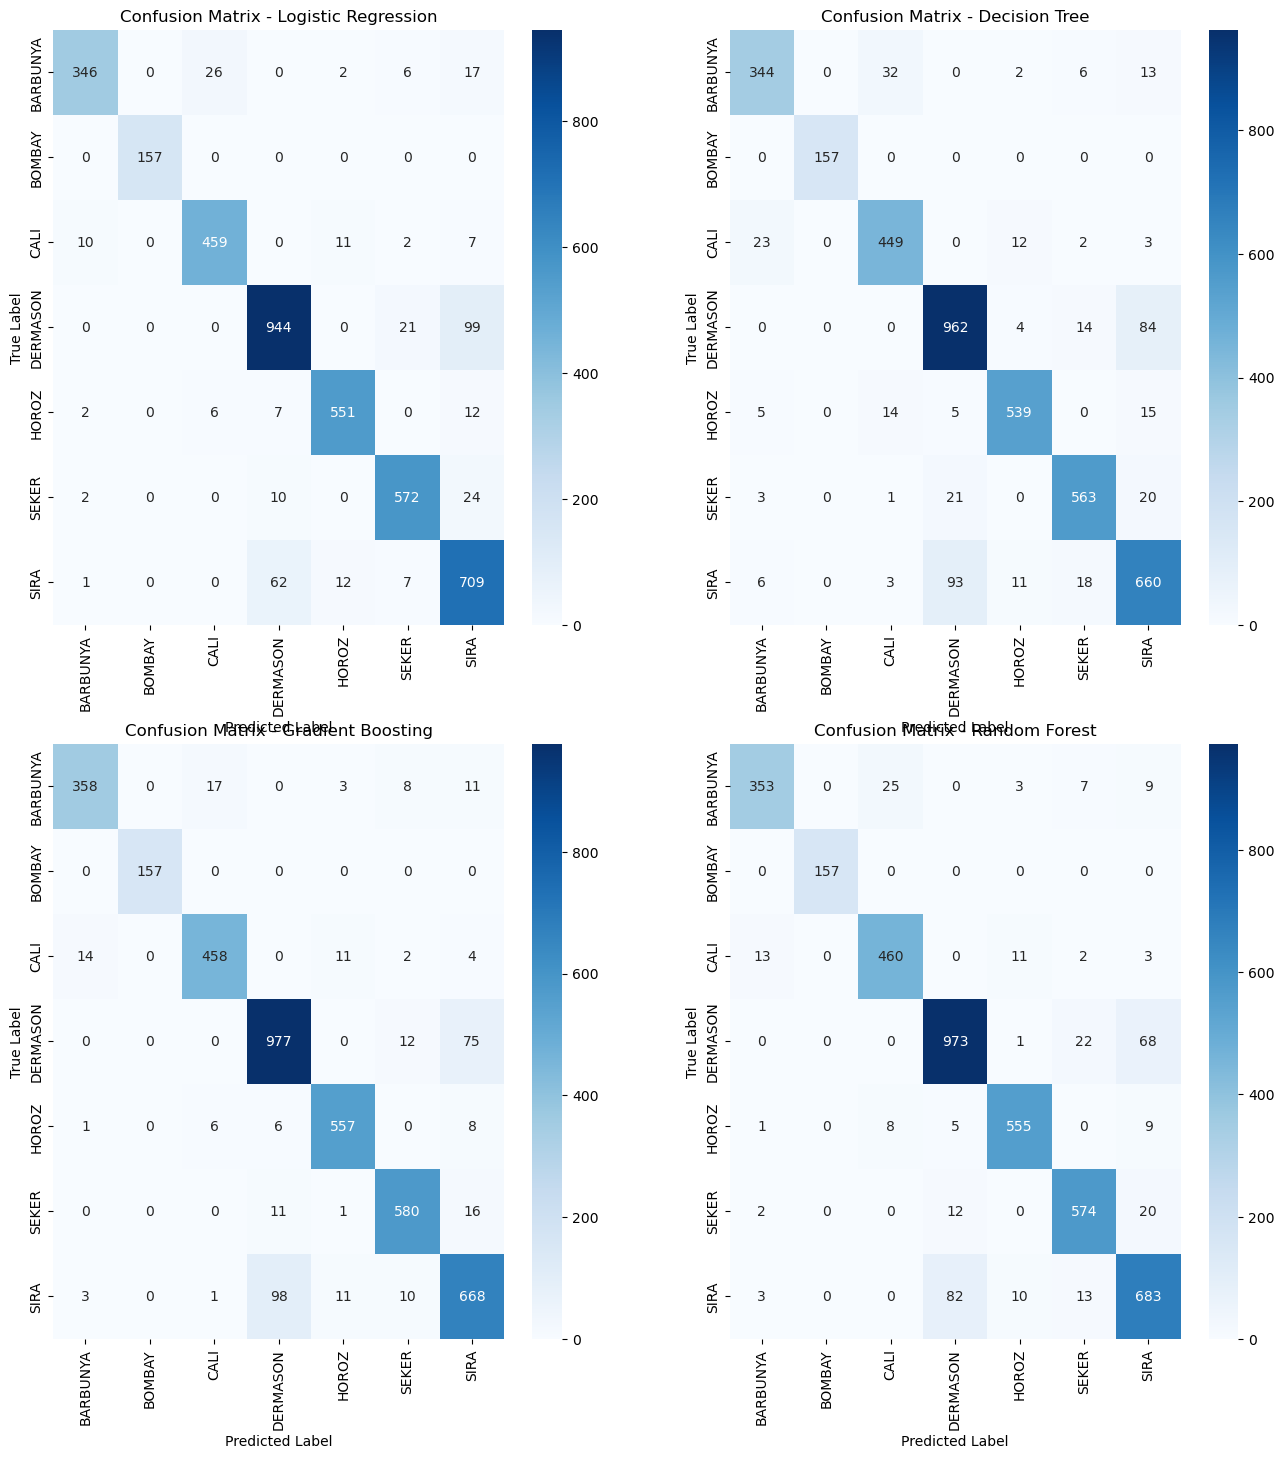

In [ ]:
# evluate all models in summary
models = {
    "Logistic Regression": log_reg_model,
    "Decision Tree": dt_model,
    "Gradient Boosting": gdb_model,
    "Random Forest": rf_model
}
y_pred_all = {}
for model_name, model in models.items():
    y_pred_all[model_name] = model.predict(X_test)


plt.figure(figsize=(16, 17))
index = 1
for model_name, y_pred in y_pred_all.items():
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    # Weighted-average (weighted by class support)
    weighted_precision = precision_score(y_test, y_pred, average='weighted')
    weighted_recall = recall_score(y_test, y_pred, average='weighted')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted') 
    
    print(f"Weighted Precision: {weighted_precision:.4f}")
    print(f"Weighted Recall: {weighted_recall:.4f}")
    print(f"Weighted F1: {weighted_f1:.4f}")
    # Plot confusion matrix
    plt.subplot(2, 2, index)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=class_names_original, yticklabels=class_names_original)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    index += 1

plt.tight_layout()

### 5.2 plot ROC curves for all models.

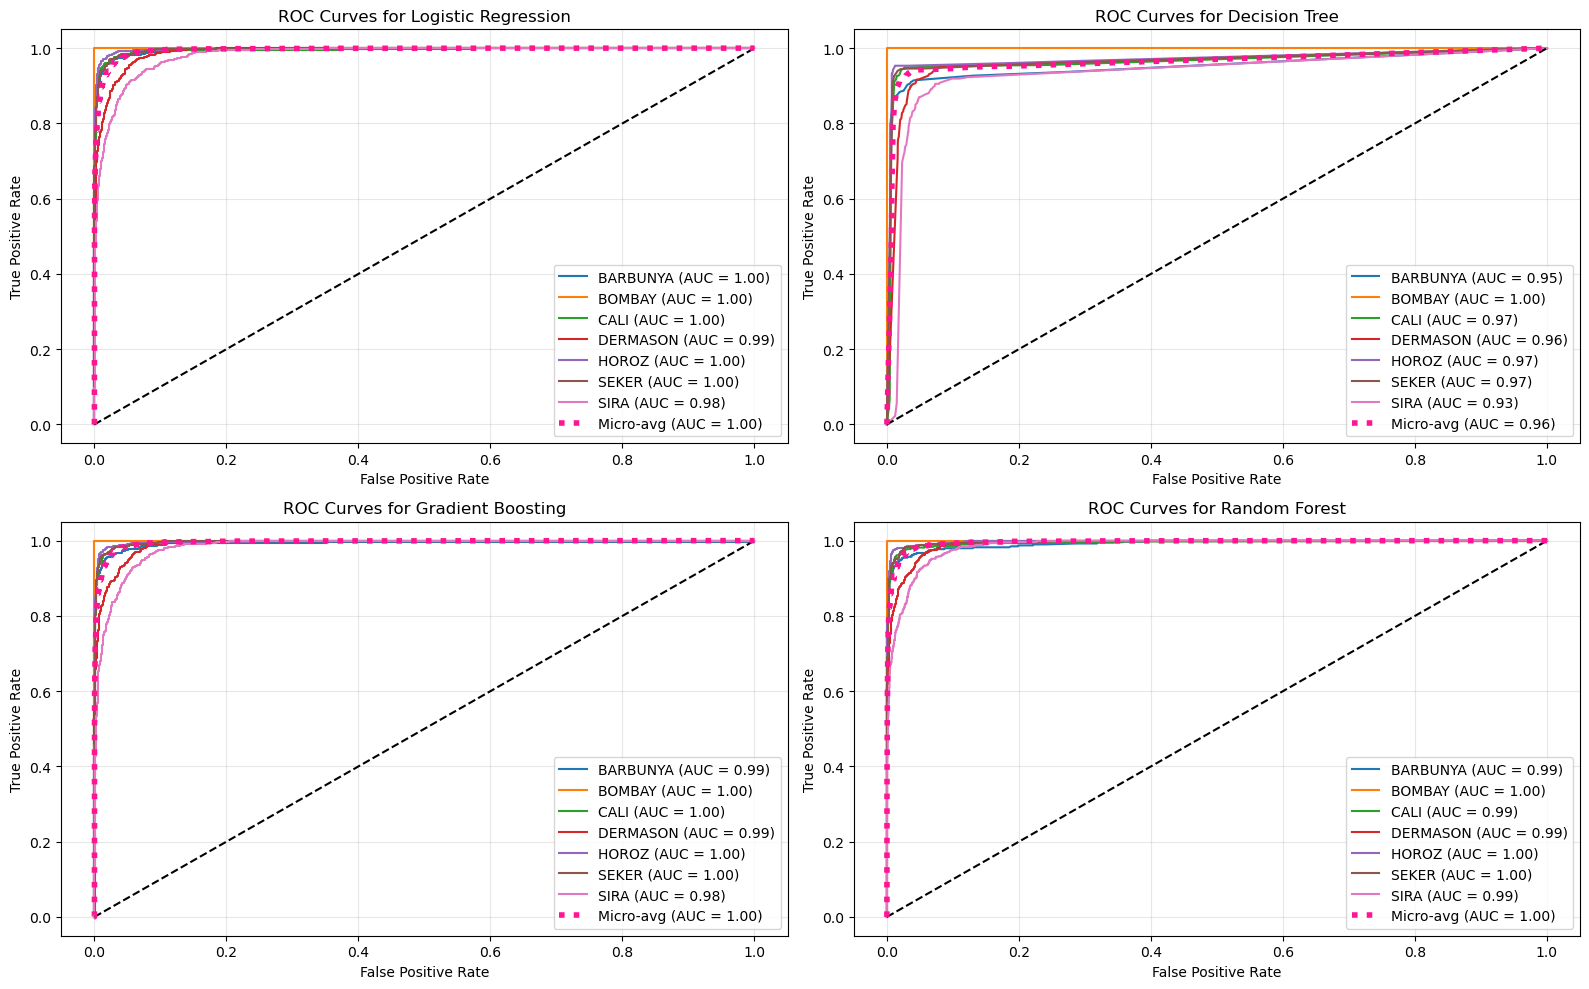

In [ ]:
# plot ROC curves for all models
plt.figure(figsize=(16, 10))
index = 1
for model_name, y_pred in y_pred_all.items():
    plt.subplot(2, 2, index)
    y_test_scores = models[model_name].predict_proba(X_test)
    plot_roc_and_calculate_auc(y_test_scores, y_test, class_names_original, title_suffix=model_name, verbose=False)
    index += 1

plt.tight_layout()

### 5.3 improve the model by validation with different param

In [1]:
# 3. 通过验证集改进模型
def improve_with_validation(baseModel, modelList, X, y, paramList):
    """使用验证集改进模型"""
    # split the data into train, validation, and test sets for ratio [0.6:0.1:0.3]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.25, random_state=42)
    
    initial_model_list = modelList.copy()
    # 训练初始模型
    baseModel.fit(X_train, y_train)
    y_val_pred = baseModel.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Initial model accuracy on validation set: {accuracy:.4f}")
    accuracy_test = accuracy_score(y_test, baseModel.predict(X_test))
    print(f"Initial model accuracy on test set: {accuracy_test:.4f}")
    
    best_score = accuracy
    best_model_index = None

    for index, model in enumerate(modelList):
        # 训练模型
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_val_pred)
        print(f"Model param: {paramList[index]}, Validation Accuracy: {accuracy:.4f}")
        
        if accuracy > best_score:
            best_score = accuracy
            best_model_index = index
            # print(f"New best model found: {model.__class__.__name__} with accuracy: {best_score:.4f}")
    
    if best_model_index is None:
        print("No model is better than the initial model.")
        return

    # select the best model
    best_model = initial_model_list[best_model_index]
    print(f"Best model: {best_model.__class__.__name__} with accuracy: {best_score:.4f}")
    # retrain the best model on the entire training set
    best_model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Best model accuracy on test set: {accuracy:.4f}")


In [ ]:
from sklearn.linear_model import LogisticRegression

modelList = []
CList = [0.1, 10, 100, 1000]
for someC in CList:
    modelList.append(LogisticRegression(solver='saga', multi_class='ovr', random_state=42, max_iter=1000, C=someC))

log_reg_model = LogisticRegression(solver='saga', multi_class='ovr', random_state=42) # Default C = 1
improve_with_validation(log_reg_model, modelList, X, y, CList)

Initial model accuracy on validation set: 0.9192
Initial model accuracy on test set: 0.9178
Model param: 0.1, Validation Accuracy: 0.9123
Model param: 10, Validation Accuracy: 0.9202
Model param: 100, Validation Accuracy: 0.9194
Model param: 1000, Validation Accuracy: 0.9194
Best model: LogisticRegression with accuracy: 0.9202
Best model accuracy on test set: 0.9222


In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelList = []
maxDepthList = [5, 8, 9, 11, 12, 13, 15, 20] # 10 is the default value
for someDepth in maxDepthList:
    modelList.append(DecisionTreeClassifier(random_state=42, max_depth=someDepth))

dt_model = DecisionTreeClassifier(random_state=42, max_depth=10) # Example: max_depth=10
improve_with_validation(dt_model, modelList, X, y, maxDepthList)

Initial model accuracy on validation set: 0.9057
Initial model accuracy on test set: 0.8965
Model param: 5, Validation Accuracy: 0.8802
Model param: 8, Validation Accuracy: 0.9050
Model param: 9, Validation Accuracy: 0.9082
Model param: 11, Validation Accuracy: 0.9025
Model param: 12, Validation Accuracy: 0.8976
Model param: 13, Validation Accuracy: 0.8964
Model param: 15, Validation Accuracy: 0.8964
Model param: 20, Validation Accuracy: 0.8937
Best model: DecisionTreeClassifier with accuracy: 0.9082
Best model accuracy on test set: 0.8913


In [ ]:
# modelList = []
# lRList = [0.01, 0.05, 0.2, 0.5, 1, 5, 10] # 0.1 is the default value
# for some_lr in lRList:
#     modelList.append(GradientBoostingClassifier(random_state=42, learning_rate=some_lr))

# gdb_model = GradientBoostingClassifier(random_state=42)
# improve_with_validation(gdb_model, modelList, X, y, lRList)


Initial model accuracy on validation set: 0.9292
Initial model accuracy on test set: 0.9347
Model param: 0.01, Validation Accuracy: 0.9094
Model param: 0.05, Validation Accuracy: 0.9258
Model param: 0.2, Validation Accuracy: 0.9260
Model param: 0.5, Validation Accuracy: 0.9238
Model param: 1, Validation Accuracy: 0.8993
Model param: 5, Validation Accuracy: 0.0238
Model param: 10, Validation Accuracy: 0.2158
No model is better than the initial model.



NameError: name 'dt_model' is not defined

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
modelList = []
n_estimatorList = [10, 50, 200, 500] # 100 is the default value
for some_n_estimator in n_estimatorList:
    modelList.append(GradientBoostingClassifier(random_state=42, n_estimators=some_n_estimator))

gdb_model = GradientBoostingClassifier(random_state=42)
improve_with_validation(gdb_model, modelList, X, y, n_estimatorList)

Initial model accuracy on validation set: 0.9292
Initial model accuracy on test set: 0.9347
Model param: 10, Validation Accuracy: 0.9101
Model param: 50, Validation Accuracy: 0.9265
Model param: 200, Validation Accuracy: 0.9285
Model param: 500, Validation Accuracy: 0.9265
No model is better than the initial model.


In [4]:
from sklearn.ensemble import RandomForestClassifier
modelList = []
n_estimatorList = [10, 50, 200, 500] # 100 is the default value
for some_n_estimator in n_estimatorList:
    modelList.append(RandomForestClassifier(random_state=42, n_estimators=some_n_estimator))

rf_model = RandomForestClassifier(random_state=42)
improve_with_validation(rf_model, modelList, X, y, n_estimatorList)

Initial model accuracy on validation set: 0.9255
Initial model accuracy on test set: 0.9251
Model param: 10, Validation Accuracy: 0.9211
Model param: 50, Validation Accuracy: 0.9224
Model param: 200, Validation Accuracy: 0.9265
Model param: 500, Validation Accuracy: 0.9265
Best model: RandomForestClassifier with accuracy: 0.9265
Best model accuracy on test set: 0.9273


In [5]:
from sklearn.ensemble import RandomForestClassifier
modelList = []
maxFeatureList = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] # 100 is the default value
for some_maxFeature in maxFeatureList:
    modelList.append(RandomForestClassifier(random_state=42, max_features=some_maxFeature, n_estimators=200))

rf_model = RandomForestClassifier(random_state=42)
improve_with_validation(rf_model, modelList, X, y, maxFeatureList)

Initial model accuracy on validation set: 0.9255
Initial model accuracy on test set: 0.9251
Model param: 3, Validation Accuracy: 0.9265
Model param: 4, Validation Accuracy: 0.9265
Model param: 5, Validation Accuracy: 0.9263
Model param: 6, Validation Accuracy: 0.9268
Model param: 7, Validation Accuracy: 0.9255
Model param: 8, Validation Accuracy: 0.9263
Model param: 9, Validation Accuracy: 0.9268
Model param: 10, Validation Accuracy: 0.9248
Model param: 11, Validation Accuracy: 0.9275
Model param: 12, Validation Accuracy: 0.9263
Model param: 13, Validation Accuracy: 0.9238
Best model: RandomForestClassifier with accuracy: 0.9275
Best model accuracy on test set: 0.9273


In [6]:
from sklearn.ensemble import RandomForestClassifier
modelList = []
maxDepthList = [3, 5, 8, 9, 11, 12, 13, 15, 20] # 10 is the default value
for someDepth in maxDepthList:
    modelList.append(RandomForestClassifier(random_state=42, max_depth=someDepth, n_estimators=200, max_features=11))

rf_model = RandomForestClassifier(random_state=42, max_depth=10) # Example: max_depth=10
improve_with_validation(rf_model, modelList, X, y, maxDepthList)

Initial model accuracy on validation set: 0.9224
Initial model accuracy on test set: 0.9258
Model param: 3, Validation Accuracy: 0.7776
Model param: 5, Validation Accuracy: 0.8844
Model param: 8, Validation Accuracy: 0.9233
Model param: 9, Validation Accuracy: 0.9229
Model param: 11, Validation Accuracy: 0.9248
Model param: 12, Validation Accuracy: 0.9246
Model param: 13, Validation Accuracy: 0.9238
Model param: 15, Validation Accuracy: 0.9273
Model param: 20, Validation Accuracy: 0.9263
Best model: RandomForestClassifier with accuracy: 0.9273
Best model accuracy on test set: 0.9302


### 5.4 Interpret the results to assess each model's strengths, weaknesses and possible improvements (by inspecting the learning curve)

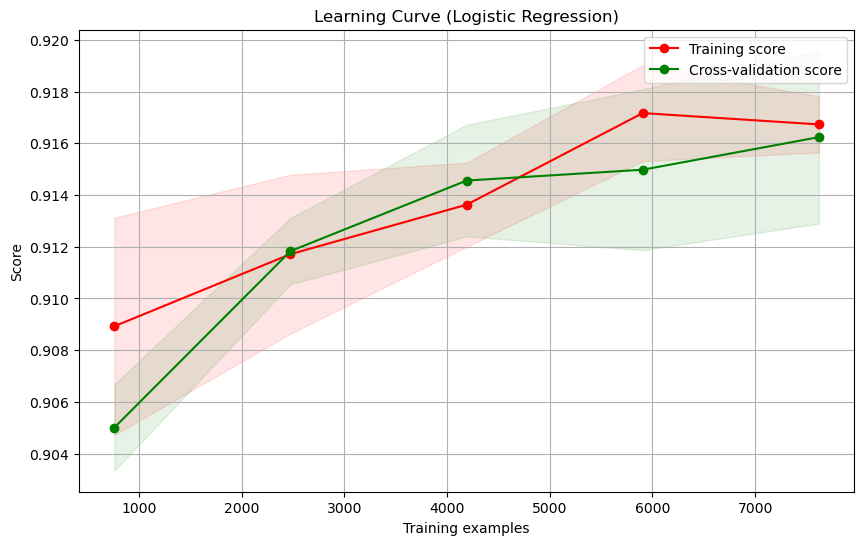

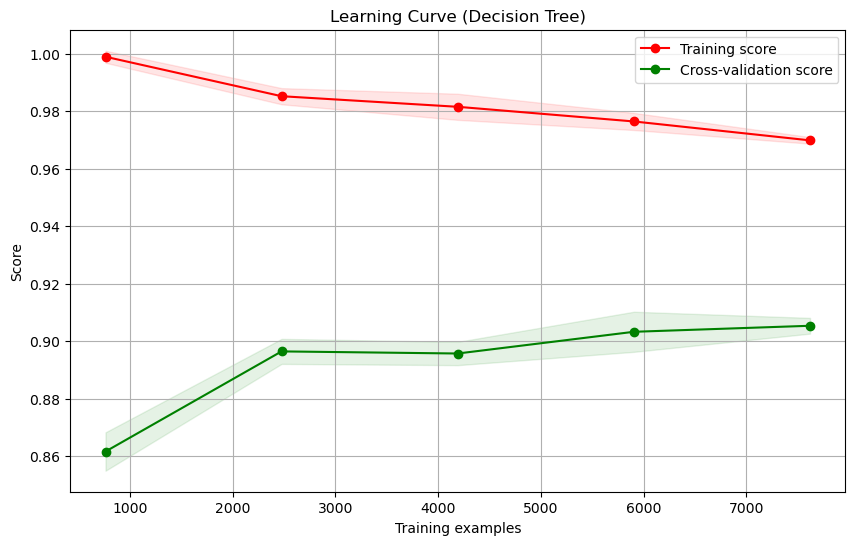

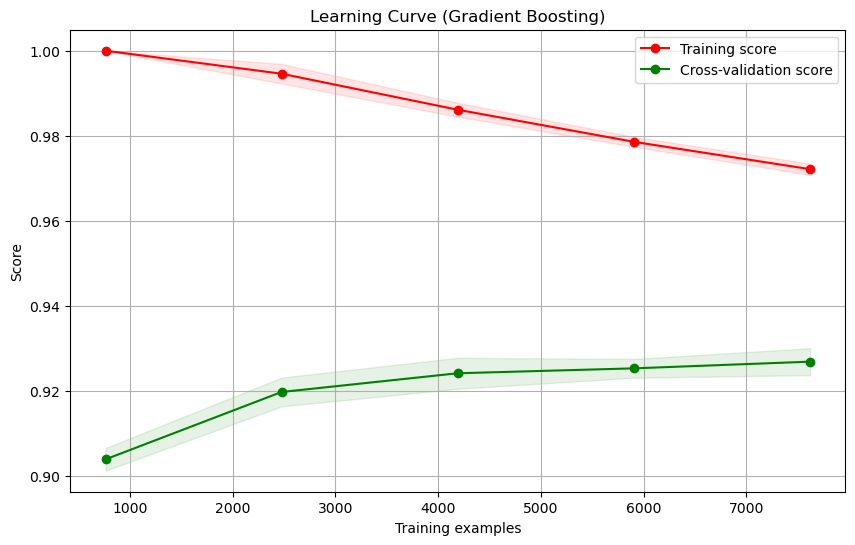

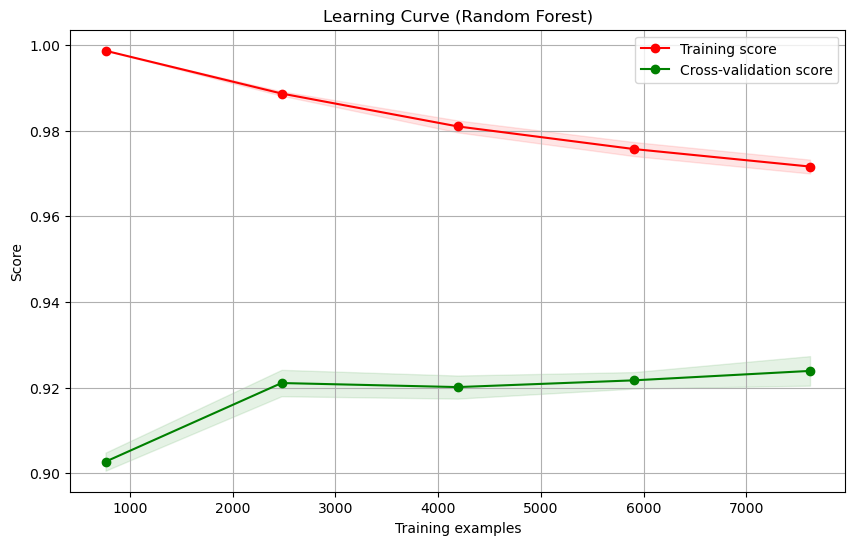

In [9]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1,
        train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()

log_reg_model = LogisticRegression(solver='saga', multi_class='ovr', random_state=42) 
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
gdb_model = GradientBoostingClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42, max_depth=10)
# Plot learning curves for each model
plot_learning_curve(log_reg_model, "Learning Curve (Logistic Regression)", X_train, y_train)
plot_learning_curve(dt_model, "Learning Curve (Decision Tree)", X_train, y_train)
plot_learning_curve(gdb_model, "Learning Curve (Gradient Boosting)", X_train, y_train)
plot_learning_curve(rf_model, "Learning Curve (Random Forest)", X_train, y_train)

### Model-Specific Strengths, Weaknesses and possible improvements

Logistic Regression

Strengths:
• Simple and interpretable (stable that the score for training and validation is similar)

• Fast training time


Weaknesses:
• struggle with complex decision boundaries (the score improve less as the training examples increase)

• Lower accuracy compared to ensemble methods


Possible Improvements:

• Consider polynomial features for non-linear relationships


Decision Tree

Strengths:
• Simple implementation

Weaknesses:
• Prone to overfitting 

• Low accuracy compared to other model


Possible Improvements:
• Tune max_depth and min_samples_split to prevent overfitting

• Use ensemble methods (which we already did with RF and GBDT)


Gradient Boosting

Strengths:
• Often achieves high accuracy

• Built-in feature importance


Weaknesses:
• More sensitive to overfitting

• Slower training

Possible Improvements:
• Adjust learning_rate and n_estimators

Random Forest

Strengths:
• Often achieves high accuracy

• Provides feature importance metrics


Weaknesses:
• Less interpretable


Possible Improvements:
• Optimize number of trees (n_estimators)

• Tune max_features parameter


# 6. Open-end exploration
### 6.1 improve model via validation by random search

In [53]:

# 查看超参数调优排序 change setting to check the hyperparameter tuning results
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.max_colwidth', None)  # 显示完整单元格内容
pd.set_option('display.expand_frame_repr', False)  # 禁止自动换行

from sklearn.model_selection import RandomizedSearchCV

def random_search_cv(model, param_grid, X_train, y_train):

    """ param_grid for hyperparameter search"""
    
    randomized_search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=20,
        scoring='f1_weighted',
        cv=5,
        random_state=42
    )
    
    randomized_search.fit(X_train, y_train)
    
    # check the results and hyperparameters combination
    results_df = pd.DataFrame(randomized_search.cv_results_)
    sorted_results = results_df.sort_values(by='mean_test_score', ascending=False)

    print(sorted_results[['params', 'mean_test_score', 'rank_test_score']].head(10))

    print(f"best params: {randomized_search.best_params_}")
    print(f"best score: {randomized_search.best_score_:.4f}")
    best_model = randomized_search.best_estimator_

    print("\npreformance on test set")
    y_test_pred = best_model.predict(X_test)
    print(f"accurracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"f1_score: {f1_score(y_test, y_test_pred, average='weighted'):.4f}")
    
    # return randomized_search.best_estimator_, randomized_search.cv_results_


In [ ]:

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # 1/C for regularization strength
    'solver': ['lbfgs', 'saga', 'newton-cg', 'newton-cholesky'],  # different algorithm for optimization
    'multi_class': ['ovr', 'multinomial'],
    'max_iter': [1000, 1500, 2000],  # max iteration 
}

random_search_cv(LogisticRegression(max_iter=1000, random_state=42), param_grid, X_train, y_train)


In [ ]:
# hyperparameter tuning for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # 分裂质量评估标准
    'max_depth': [None, 5, 10, 20, 50],          # 树的最大深度
    'min_samples_split': [2, 5, 10],             # 分裂所需最小样本数
    'min_samples_leaf': [1, 2, 4],               # 叶节点最小样本数
    'max_features': ['sqrt', 'log2', None],      # 考虑的最大特征数
    'class_weight': [None, 'balanced']          # 类别权重
}

random_search_cv(DecisionTreeClassifier(random_state=42), param_grid_dt, X_train, y_train)


                                                                                                                                           params  mean_test_score  rank_test_score
3        {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'log_loss', 'class_weight': None}         0.902485                1
4         {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 50, 'criterion': 'gini', 'class_weight': 'balanced'}         0.902339                2
7   {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}         0.901180                3
10            {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'class_weight': None}         0.901148                4
19        {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 50, 'cr

In [55]:
# hyperparameter tuning for Decision Tree
param_grid_rf = {
    'n_estimators': [50, 100, 200],              # 树的数量
    'criterion': ['gini', 'entropy', 'log_loss'], # 分裂标准
    'max_depth': [None, 5, 10, 20],              # 单棵树的最大深度
    'min_samples_split': [2, 5, 10],             # 分裂所需最小样本数
    'min_samples_leaf': [1, 2, 4],               # 叶节点最小样本数
    'max_features': ['sqrt', 'log2', None],       # 考虑的最大特征数
    'bootstrap': [True, False],                  # 是否有放回采样
}

random_search_cv(RandomForestClassifier(random_state=42), param_grid_rf, X_train, y_train)


                                                                                                                                                                                                params  mean_test_score  rank_test_score
4                     {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'log_loss', 'class_weight': None, 'bootstrap': False}         0.917546                1
5                         {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': None, 'bootstrap': False}         0.917197                2
15               {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'criterion': 'log_loss', 'class_weight': 'balanced', 'bootstrap': True}         0.916866                3
1     {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_le

### 6.2 Model comparison

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'k-NN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000, early_stopping=True),
    'MLP (100-50)': MLPClassifier(hidden_layer_sizes=(100,50), random_state=42, max_iter=1000),
    'MLP (100-50-20)': MLPClassifier(hidden_layer_sizes=(100,50,20), random_state=42, max_iter=1000)
}

# Stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    results[name] = {
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores),
        'all_scores': scores
    }

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': results.keys(),
    'Mean Accuracy': [x['mean_accuracy'] for x in results.values()],
    'Std Accuracy': [x['std_accuracy'] for x in results.values()]
}).sort_values('Mean Accuracy', ascending=False)

comparison_df

,Model,Mean Accuracy,Std Accuracy
6,MLP (100-50-20),0.929396,0.004805
2,SVM,0.928661,0.006117
5,MLP (100-50),0.928073,0.004117
4,Neural Network,0.928000,0.004879
1,Random Forest,0.924694,0.005331
3,k-NN,0.924106,0.004138
0,Logistic Regression,0.923886,0.005620


### 6.3 feature engineering (add more polynominal feature)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree=2 includes squares and interactions)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_scaled_df)

# Convert to DataFrame for easier handling
poly_feature_names = poly.get_feature_names_out(X_scaled_df.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

print(f"Original features: {X_scaled_df.shape[1]}")
print(f"After polynomial expansion: {X_poly_df.shape[1]}")

Original features: 16
After polynomial expansion: 152


In [13]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.3, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

class_names_original = label_encoder.classes_

Shape of X_train: (9527, 152)
Shape of X_test: (4084, 152)
Shape of y_train: (9527,)
Shape of y_test: (4084,)


In [ ]:
from sklearn.linear_model import LogisticRegression

print("\n\n--- Training and Evaluating Logistic Regression ---")

log_reg_model = LogisticRegression(
    solver='saga',
    multi_class='ovr', 
    random_state=42,
    max_iter=1000,
    C=1.0
)
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model trained.")

y_test_pred = log_reg_model.predict(X_test)

# Evaluate on Test set
print("\nEvaluating Logistic Regression on Test Set:")

accuracy = accuracy_score(y_test, y_test_pred)  # calculate accuracy 计算准确率
report = classification_report(y_test, y_test_pred, target_names=class_names_original, zero_division=0, digits=2) 
cm = confusion_matrix(y_test, y_test_pred)  # calculate confusion matrix 计算混淆矩阵

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)



--- Training and Evaluating Logistic Regression ---


d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_sag.py:350: Convergen

Logistic Regression model trained.

Evaluating Logistic Regression on Test Set:
Accuracy: 0.9221

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.90      0.92       397
      BOMBAY       1.00      0.99      0.99       157
        CALI       0.95      0.94      0.94       489
    DERMASON       0.93      0.90      0.91      1064
       HOROZ       0.96      0.96      0.96       578
       SEKER       0.93      0.95      0.94       608
        SIRA       0.84      0.89      0.87       791

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


improve from 0.9153 to 0.9221 compared to 16 features

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print("\n\n--- Training and Evaluating Decision Tree Classifier ---")

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10) # Example: max_depth=10
dt_model.fit(X_train, y_train)
y_test_pred = dt_model.predict(X_test)

# Evaluate on Test set
print("\nEvaluating Decision Tree on Test Set:")

accuracy = accuracy_score(y_test, y_test_pred)  # calculate accuracy 计算准确率
report = classification_report(y_test, y_test_pred, target_names=class_names_original, zero_division=0, digits=2) 
cm = confusion_matrix(y_test, y_test_pred)  # calculate confusion matrix 计算混淆矩阵

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)



--- Training and Evaluating Decision Tree Classifier ---

Evaluating Decision Tree on Test Set:
Accuracy: 0.8996

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.91      0.87      0.89       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.93      0.92      0.92       489
    DERMASON       0.90      0.88      0.89      1064
       HOROZ       0.94      0.95      0.94       578
       SEKER       0.91      0.93      0.92       608
        SIRA       0.82      0.85      0.84       791

    accuracy                           0.90      4084
   macro avg       0.92      0.91      0.91      4084
weighted avg       0.90      0.90      0.90      4084



similar to the original model of acuracy 0.8996

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
print("\n\n--- Gradient Boosting Classifier ---")

# train the GBT model
gdb_model = GradientBoostingClassifier(random_state=42)
gdb_model.fit(X_train, y_train)
y_test_pred = gdb_model.predict(X_test)

# Evaluate on Test set
print("\nEvaluating Gradient Boosting Classifier on Test Set:")

accuracy = accuracy_score(y_test, y_test_pred)  # calculate accuracy 计算准确率
report = classification_report(y_test, y_test_pred, target_names=class_names_original, zero_division=0, digits=2) 
cm = confusion_matrix(y_test, y_test_pred)  # calculate confusion matrix 计算混淆矩阵

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)



--- Gradient Boosting Classifier ---

Evaluating Gradient Boosting Classifier on Test Set:
Accuracy: 0.9234

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.95      0.93      0.94       489
    DERMASON       0.91      0.92      0.92      1064
       HOROZ       0.95      0.96      0.96       578
       SEKER       0.95      0.95      0.95       608
        SIRA       0.86      0.86      0.86       791

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.94      4084
weighted avg       0.92      0.92      0.92      4084



In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("\n\n--- Training and Evaluating Random Forest Classifier ---")

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, n_jobs=-1) # n_jobs=-1 uses all processors
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate on Test set
print("\nEvaluating Random Forest Classifier on Test Set:")

accuracy = accuracy_score(y_test, y_test_pred)  # calculate accuracy 计算准确率
report = classification_report(y_test, y_test_pred, target_names=class_names_original, zero_division=0, digits=2) 
cm = confusion_matrix(y_test, y_test_pred)  # calculate confusion matrix 计算混淆矩阵

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)



--- Training and Evaluating Random Forest Classifier ---

Evaluating Random Forest Classifier on Test Set:
Accuracy: 0.9214

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.90      0.92       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.94      0.94      0.94       489
    DERMASON       0.91      0.92      0.91      1064
       HOROZ       0.96      0.96      0.96       578
       SEKER       0.94      0.94      0.94       608
        SIRA       0.86      0.87      0.86       791

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



C:\Users\24104\AppData\Local\Temp\ipykernel_12028\682943676.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


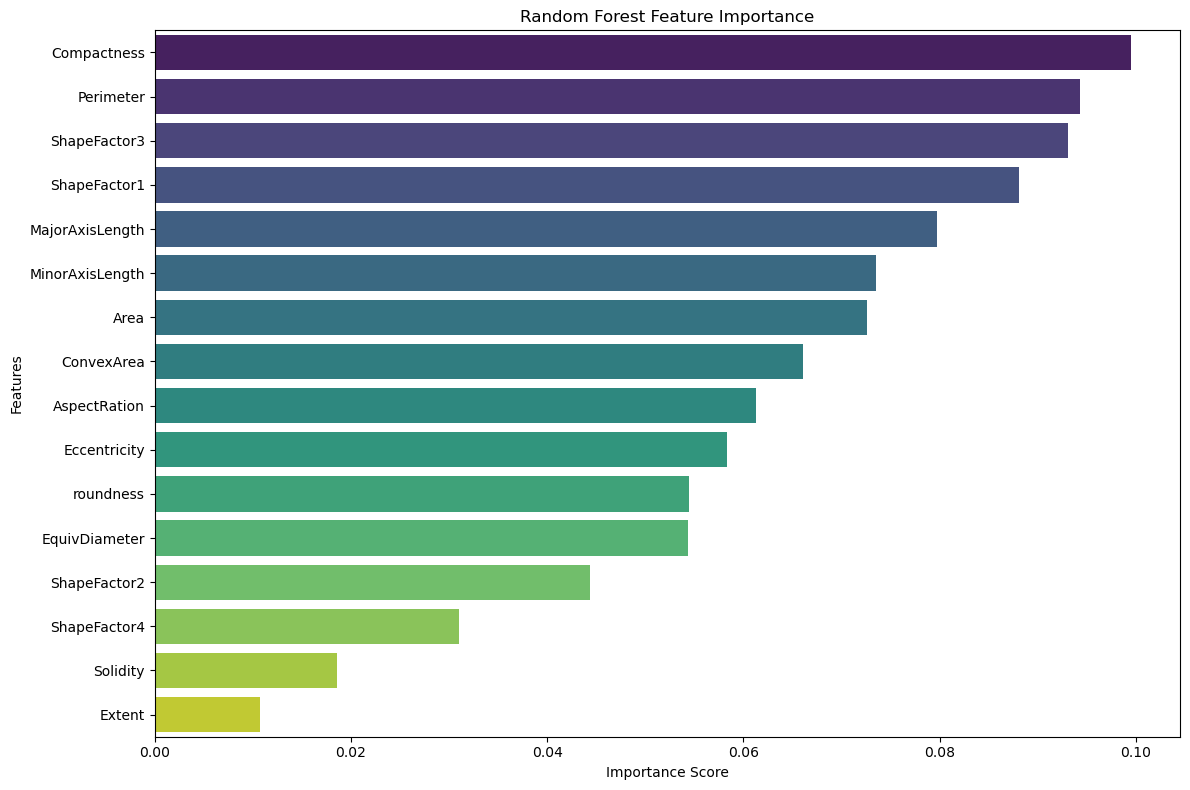

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)
importance = model.feature_importances_

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': X_scaled_df.columns,
    'Importance': importance
})

# Sort features by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [41]:
threshold = 0.05
selected_features = feature_importance[feature_importance['Importance'] > threshold]['Feature'].values

print(f"\nSelected features (importance > {threshold}):")
print(selected_features)

# Create new dataset with selected features
X_selected = X_scaled_df[selected_features]
print(f"Shape of new dataset with selected features: {X_selected.shape}")


Selected features (importance > 0.05):
['ShapeFactor3' 'Compactness' 'Perimeter' 'MajorAxisLength'
 'MinorAxisLength' 'ShapeFactor1' 'Area' 'AspectRation' 'ConvexArea'
 'EquivDiameter' 'Eccentricity' 'roundness']
Shape of new dataset with selected features: (13611, 12)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree=2 includes squares and interactions)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_selected)

# Convert to DataFrame for easier handling
poly_feature_names = poly.get_feature_names_out(X_selected.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

print(f"After polynomial expansion: {X_poly_df.shape[1]}")

Original features: 16
After polynomial expansion: 90


In [ ]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.3, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

class_names_original = label_encoder.classes_

Shape of X_train: (9527, 90)
Shape of X_test: (4084, 90)
Shape of y_train: (9527,)
Shape of y_test: (4084,)


In [ ]:
from sklearn.linear_model import LogisticRegression

print("\n\n--- Training and Evaluating Logistic Regression ---")

log_reg_model = LogisticRegression(
    solver='saga',
    multi_class='ovr', 
    random_state=42,
    max_iter=1000,
    C=1.0
)
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model trained.")

y_test_pred = log_reg_model.predict(X_test)

# Evaluate on Test set
print("\nEvaluating Logistic Regression on Test Set:")

accuracy = accuracy_score(y_test, y_test_pred)  # calculate accuracy 计算准确率
report = classification_report(y_test, y_test_pred, target_names=class_names_original, zero_division=0, digits=2) 
cm = confusion_matrix(y_test, y_test_pred)  # calculate confusion matrix 计算混淆矩阵

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)



--- Training and Evaluating Logistic Regression ---


d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression model trained.

Evaluating Logistic Regression on Test Set:
Accuracy: 0.9133

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.86      0.90       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.93      0.94      0.93       489
    DERMASON       0.92      0.89      0.91      1064
       HOROZ       0.95      0.95      0.95       578
       SEKER       0.93      0.94      0.93       608
        SIRA       0.83      0.89      0.86       791

    accuracy                           0.91      4084
   macro avg       0.93      0.92      0.93      4084
weighted avg       0.91      0.91      0.91      4084



d:\software\anaconda\envs\rm\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("\n\n--- Training and Evaluating Random Forest Classifier ---")

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, n_jobs=-1) # n_jobs=-1 uses all processors
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate on Test set
print("\nEvaluating Random Forest Classifier on Test Set:")

accuracy = accuracy_score(y_test, y_test_pred)  # calculate accuracy 计算准确率
report = classification_report(y_test, y_test_pred, target_names=class_names_original, zero_division=0, digits=2) 
cm = confusion_matrix(y_test, y_test_pred)  # calculate confusion matrix 计算混淆矩阵

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)



--- Training and Evaluating Random Forest Classifier ---

Evaluating Random Forest Classifier on Test Set:
Accuracy: 0.9133

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.91       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.92      0.94      0.93       489
    DERMASON       0.93      0.88      0.90      1064
       HOROZ       0.96      0.94      0.95       578
       SEKER       0.92      0.95      0.94       608
        SIRA       0.83      0.89      0.86       791

    accuracy                           0.91      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.91      0.91      4084

